<a href="https://colab.research.google.com/github/adarsh-meher/MH---MathCoThon/blob/master/MH_DatathonFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
!conda install -c conda-forge scikit-garden 
!pip install lightgbm
!pip install hyperopt
!pip install catboost
!pip uninstall xgboost
!pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/xgboost-1.4.0_SNAPSHOT%2B4224c08cacceba3f83f90e387c07aa6205a83bfa-py3-none-manylinux2010_x86_64.whl
!pip install mlxtend
!pip install category_encoders

/bin/bash: conda: command not found
     |████████████████████████████████| 69.2MB 41kB/s 
     |████████████████████████████████| 757kB 6.4MB/s 
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? y
  Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 166.7MB 55kB/s 
     |████████████████████████████████| 81kB 4.2MB/s 


In [ ]:
#import os
#!git clone https://github.com/h2oai/pystacknet
#os.chdir('/content/pystacknet/')
#!python setup.py install

In [2]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import PowerTransformer,LabelEncoder

In [17]:
train,test = pd.read_csv(io.BytesIO(data['train.csv'])),pd.read_csv(io.BytesIO(data['test.csv']))

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


## **EDA and Feature Engineering**

### Assissing ID column

In [20]:
train.ID.nunique()/train.shape[0]

0.983729271715964

In [21]:
test.ID.nunique()/test.shape[0]

0.9909035779260158

Some id's are repeated

In [22]:
train.ID.value_counts()[train.ID.value_counts()>1]

45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
           ..
45809824    2
45815232    2
45812670    2
45813092    2
45041479    2
Name: ID, Length: 220, dtype: int64

In [23]:
train[train.ID==45815368]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
998,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
4732,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
5121,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
5194,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
9799,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
11209,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
16216,45815368,6899,-,HONDA,Stream,2004,Minivan,No,Petrol,1.7,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4


In [24]:
ids_mult_rows = train.ID.value_counts()[train.ID.value_counts()>1].index.values.tolist()

In [25]:
def return_nunique(x):
  return len(set(x))
train[train.ID.isin(ids_mult_rows)].groupby(['ID'])['Price'].apply(lambda x : return_nunique(x)).sum()

220

Duplicate rows have all unique values in price column. We can apply drop duplicate to remove them

In [26]:
train = train.drop_duplicates()

In [27]:
train.ID.value_counts()[train.ID.value_counts()>1]

Series([], Name: ID, dtype: int64)

In [28]:
#test = test.drop_duplicates()
#test.ID.value_counts()[test.ID.value_counts()>1]

### **Analyzing target variable**

In [29]:
target = 'Price'

In [30]:
train.Price.describe()

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

In [31]:
tar_seq = train[target].values
for i in range(95,101,1):
  print('Value at percentile {0} : {1}'.format(i,np.percentile(tar_seq,i)))

Value at percentile 95 : 49410.2999999998
Value at percentile 96 : 52959.0
Value at percentile 97 : 57189.840000000346
Value at percentile 98 : 66485.0
Value at percentile 99 : 84675.0
Value at percentile 100 : 26307500.0


In [32]:
sudden_inc_vals = [627220,   872946, 26307500]

In [33]:
train[train.Price.isin(sudden_inc_vals)]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1225,45795524,627220,-,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
16983,45812886,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


In [34]:
train = train.sort_values(ascending = True,by = ['Price'])
train.index = range(train.shape[0])

In [35]:
train_rem_out = train.loc[:18920,:]

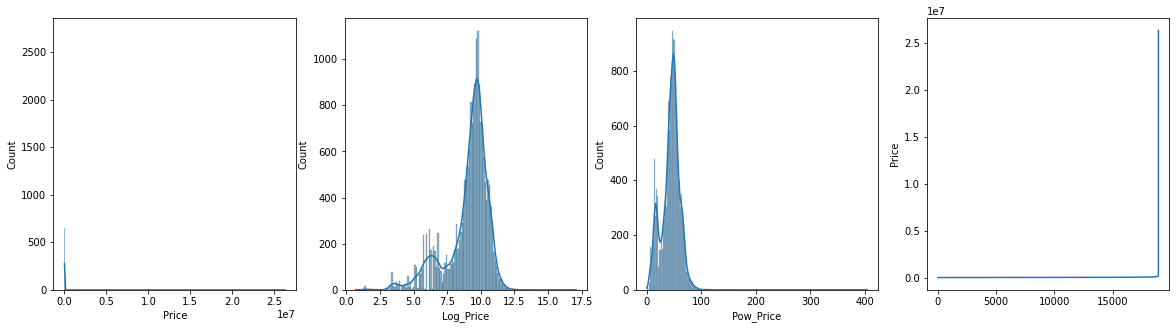

In [36]:
train['Log_Price'] = train['Price'].map(lambda x : np.log(x+1))
pow_trans = PowerTransformer(method='box-cox',standardize=False)
train['Pow_Price'] = pow_trans.fit_transform(train['Price'].values.reshape(-1,1))

fig,axs = plt.subplots(figsize = (20,5),nrows = 1,ncols = 4)
sb.histplot(data=train, x="Price", kde=True,ax=axs[0])
sb.histplot(data=train, x="Log_Price", kde=True,ax=axs[1])
sb.histplot(data=train, x="Pow_Price", kde=True,ax=axs[2])
sb.lineplot(x = train.index,y=train.Price,ax=axs[3])
plt.show()

### Analyzing feature columns

In [7]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [37]:
train_copy=train.copy()
test_copy=test.copy()

In [38]:
########################### Replacing '-' with 0
train_copy['Levy'] = train_copy.Levy.map(lambda x : 0 if x=='-' else int(x))
test_copy['Levy'] = test_copy.Levy.map(lambda x : 0 if x=='-' else int(x))

######################### Number of years passed from production year
train_copy['num_years_passed'] = 2021-train_copy['Prod. year']
test_copy['num_years_passed'] = 2021-test_copy['Prod. year']

####################### Converting engine volume into float
train_copy['Engine volume'] = train_copy['Engine volume'].map(lambda x: float(x.split()[0]))
test_copy['Engine volume'] = test_copy['Engine volume'].map(lambda x: float(x.split()[0]))

###################### Extract number from mileage
train_copy.Mileage = train_copy['Mileage'].map(lambda x: float(x.split()[0]))
test_copy.Mileage = test_copy['Mileage'].map(lambda x: float(x.split()[0]))

###################### Convert door to numeric
train_copy.Doors = train_copy.Doors.map(lambda x : int(x.split('-')[0]) if '-' in x else int(x.split('>')[1]))
test_copy.Doors = test_copy.Doors.map(lambda x : int(x.split('-')[0]) if '-' in x else int(x.split('>')[1]))

In [39]:
encoding_cols = ['Manufacturer','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color']

In [ ]:
'''
def label_enc_cols(train_data,test_data,cols_to_enc=None):
  for c in cols_to_enc:
    labenc = LabelEncoder()
    df1 = pd.concat([train_data[c],test_data[c]],axis =0)
    labenc.fit(df1)
    train_data[c] = labenc.transform(train_data[c])
    test_data[c] = labenc.transform(test_data[c])
  return train_data,test_data
train_copy,test_copy = label_enc_cols(train_copy,test_copy,cols_to_enc=encoding_cols)
'''

'\ndef label_enc_cols(train_data,test_data,cols_to_enc=None):\n  for c in cols_to_enc:\n    labenc = LabelEncoder()\n    df1 = pd.concat([train_data[c],test_data[c]],axis =0)\n    labenc.fit(df1)\n    train_data[c] = labenc.transform(train_data[c])\n    test_data[c] = labenc.transform(test_data[c])\n  return train_data,test_data\ntrain_copy,test_copy = label_enc_cols(train_copy,test_copy,cols_to_enc=encoding_cols)\n'

In [ ]:
test_copy.shape

(8245, 19)

### **Describing each variable and calculating summary statistics**

In [ ]:
def create_summ_stats(data,cols_to_remove=None,target_col=None):
  cols_to_use = list(set(data.columns)-set(cols_to_remove)) if cols_to_remove!=None else data.columns.tolist()
  df1 = pd.DataFrame(columns =['ColName','Dtype','NumUnique','PropNA','Stats'],index=[0])
  df2 = pd.DataFrame()
  for c in cols_to_use:
    df1['ColName']=c
    df1['Dtype']=str(data[c].dtype)
    df1['NumUnique']=data[c].nunique()
    df1['PropNA']=data[c].isnull().sum()/data.shape[0]
    df1['ColCat'] = 'binary' if (df1['NumUnique'].values[0]<=2) else 'categorical' if ((df1['NumUnique'].values[0]>2) & (df1['NumUnique'].values[0]<15)) else 'continuous'
    df1['Stats'] = str({ j:data[c].describe().to_dict()[j] for j in ['max','mean','min','std','50%']}) if ((df1['ColCat'].values[0]=='continuous') & (df1['Dtype'].values[0]!='object')) else 'None'
    df2=df2.append(df1)
  return df2

In [ ]:
create_summ_stats(train_copy,cols_to_remove=['ID'])

,ColName,Dtype,NumUnique,PropNA,Stats,ColCat
0,Cylinders,float64,13,0.0,None,categorical
0,Category,object,11,0.0,None,categorical
0,Fuel type,object,7,0.0,None,categorical
0,Levy,int64,559,0.0,"{'max': 11714.0, 'mean': 632.8864933417882, 'm...",continuous
0,Engine volume,float64,65,0.0,"{'max': 20.0, 'mean': 2.3062513210736757, 'min...",continuous
0,Mileage,float64,7687,0.0,"{'max': 2147483647.0, 'mean': 1555372.71892834...",continuous
0,Drive wheels,object,3,0.0,None,categorical
0,Log_Price,float64,2315,0.0,"{'max': 17.085364665609077, 'mean': 9.02898089...",continuous
0,Model,object,1590,0.0,None,continuous
0,Prod. year,int64,54,0.0,"{'max': 2020.0, 'mean': 2010.914235890932, 'mi...",continuous


### Analyzing remaining features

In [40]:
train_copy.shape

(18924, 21)

In [41]:
print('Prod year in train not in test : {0}'.format(set(train_copy['Prod. year'])-set(test_copy['Prod. year'])))
print('Prod year in test not in train : {0}'.format(set(test_copy['Prod. year'])-set(train_copy['Prod. year'])))

Prod year in train not in test : {1953, 1985, 1957, 1964, 1965, 1939, 1973, 1976, 1977, 1978, 1947, 1980, 1982, 1983}
Prod year in test not in train : {1956, 1961, 1966, 1970, 1979}


In [42]:
import math
prod_yr_grp = list(set([ math.floor(i/10)*10 for i in train_copy['Prod. year'].unique().tolist()+test_copy['Prod. year'].unique().tolist() ]))
prod_yr_grp = [ list(range(i,i+10)) for i in prod_yr_grp ]
prod_yr_grp = [ [i[:5],i[5:]] for i in prod_yr_grp]
prod_yr_grp = [ j  for i in prod_yr_grp for j in i]
prod_yr_grp

[[2020, 2021, 2022, 2023, 2024],
 [2025, 2026, 2027, 2028, 2029],
 [1990, 1991, 1992, 1993, 1994],
 [1995, 1996, 1997, 1998, 1999],
 [1960, 1961, 1962, 1963, 1964],
 [1965, 1966, 1967, 1968, 1969],
 [1930, 1931, 1932, 1933, 1934],
 [1935, 1936, 1937, 1938, 1939],
 [2000, 2001, 2002, 2003, 2004],
 [2005, 2006, 2007, 2008, 2009],
 [1970, 1971, 1972, 1973, 1974],
 [1975, 1976, 1977, 1978, 1979],
 [1940, 1941, 1942, 1943, 1944],
 [1945, 1946, 1947, 1948, 1949],
 [2010, 2011, 2012, 2013, 2014],
 [2015, 2016, 2017, 2018, 2019],
 [1980, 1981, 1982, 1983, 1984],
 [1985, 1986, 1987, 1988, 1989],
 [1950, 1951, 1952, 1953, 1954],
 [1955, 1956, 1957, 1958, 1959]]

In [43]:
def prod_yr_cat(x):
  return [ min(i) for i in prod_yr_grp if x in i ][0]
train_copy['prod_yr_cat'] = train_copy['Prod. year'].map(lambda x :prod_yr_cat(x))
test_copy['prod_yr_cat'] = test_copy['Prod. year'].map(lambda x :prod_yr_cat(x))

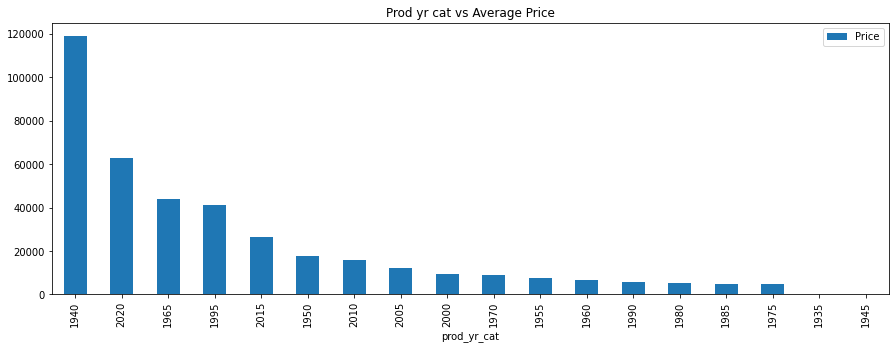

In [44]:
df = pd.DataFrame(train_copy.groupby(['prod_yr_cat'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15, 5))
plt.title('Prod yr cat vs Average Price')
plt.show()

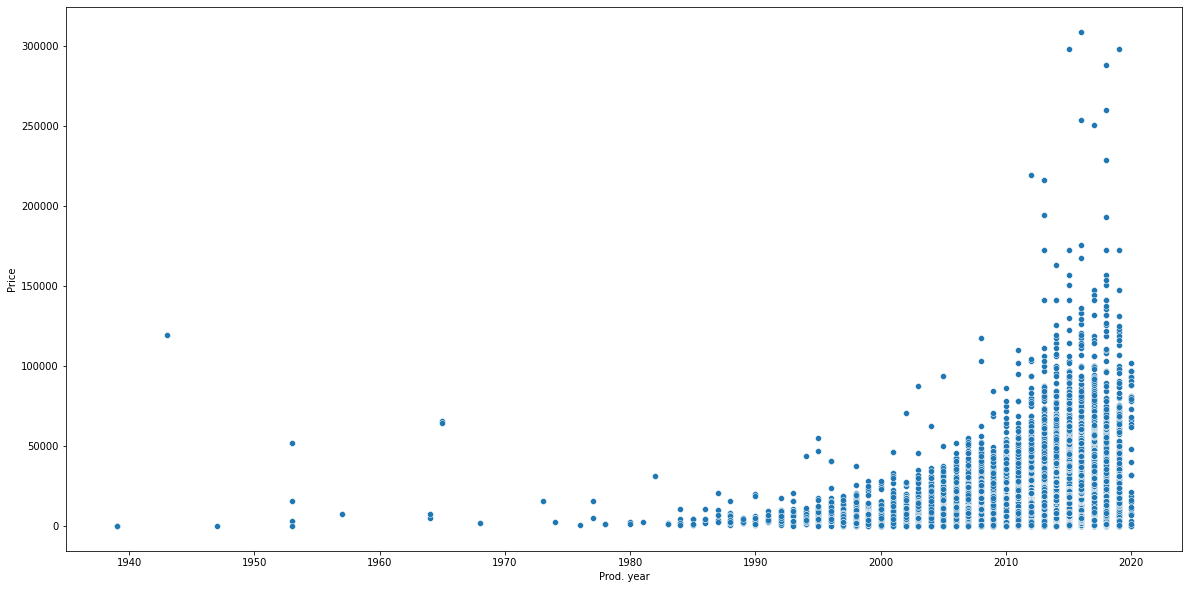

In [45]:
######################## Change in price according to production year
train_rem_out = train_copy.loc[:18920,:]
df1 = train_rem_out[['Prod. year','Price']].sort_values(ascending = True,by=['Prod. year'])
plt.figure(figsize = (20,10))
sb.scatterplot(x = df1['Prod. year'],y = df1['Price'])
plt.show()

We can try to fit an exponential growth function between production year and log price

In [47]:
###################### Fit an exponential growth function. Run CV multiple times over the dataset to get reliable estimate of parameters
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import make_scorer,mean_squared_error
def score1(actual,pred):
  mse = mean_squared_error(actual,pred)
  return np.sqrt(mse)
score2=make_scorer(score1,greater_is_better=False)
slope_list,inter_list = [],[]
for i in range(20):
  df1 = train_copy[['Prod. year','Price']].sample(frac=1)
  df1['Price'] = df1['Price'].map(lambda x : np.log1p(x))
  linreg_fit = cross_validate(LinearRegression(fit_intercept=True),df1['Prod. year'].values.reshape(-1,1),df1['Price'],scoring=score2,cv=3,return_estimator=True)
  slope,intercept = np.mean([ i.coef_ for i in linreg_fit['estimator'] ]),np.mean([ i.intercept_ for i in linreg_fit['estimator'] ])
  slope_list.append(slope)
  inter_list.append(intercept)

cv_slope = np.mean(slope_list)
cv_intercept = np.mean(inter_list)
train_copy['log_price_grow_pred'] = cv_intercept+ cv_slope*train_copy['Prod. year']
test_copy['log_price_grow_pred'] = cv_intercept+ cv_slope*train_copy['Prod. year']

In [48]:
############################### 
print('Category in train not in test : {0}'.format(set(train_copy['Category'])-set(test_copy['Category'])))
print('Category in test not in train : {0}'.format(set(test_copy['Category'])-set(train_copy['Category'])))

Category in train not in test : set()
Category in test not in train : set()


In [49]:
################################# Category wise production year
t1 = train_copy.groupby(['Category','prod_yr_cat'])['Price'].agg([np.count_nonzero,np.min,np.max,np.mean,np.median,np.std]).reset_index().sort_values(ascending=False,by=['count_nonzero'])
t1['cat_yr'] = t1['Category']+'_'+t1['prod_yr_cat'].astype(str)

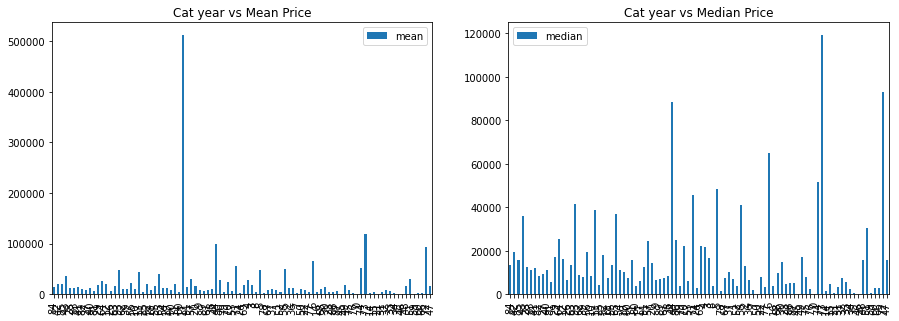

In [50]:
fig,axs = plt.subplots(figsize=(20,5),nrows=1,ncols=2)
t1[['cat_yr','mean']].plot.bar(figsize=(15,5),ax=axs[0],title='Cat year vs Mean Price')
t1[['cat_yr','median']].plot.bar(figsize=(15,5),ax=axs[1],title='Cat year vs Median Price')
plt.show()

Mean price differs across category-prod year column.We can target encode categories in the next set of iterations

In [51]:
train_copy['cat_prodyr_comb'] = train_copy.Category+'_'+train_copy.prod_yr_cat.astype(str)
test_copy['cat_prodyr_comb'] = test_copy.Category+'_'+test_copy.prod_yr_cat.astype(str)

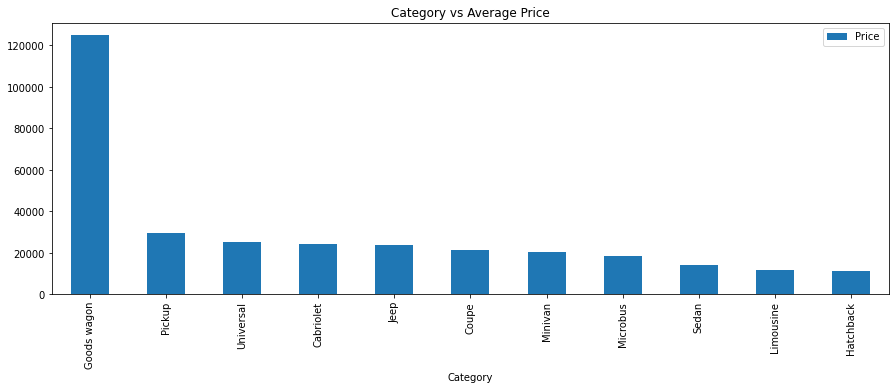

In [52]:
df = pd.DataFrame(train_copy.groupby(['Category'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,5))
plt.title('Category vs Average Price')
plt.show()

We can see Goods Wagon have sigificantly high mean price as compared to other categories. Create a binary variable indicating goods wagon category

In [53]:
############################### 
print('Manufacturer in train not in test : {0}'.format(set(train_copy['Manufacturer'])-set(test_copy['Manufacturer'])))
print('Manufacturer in test not in train : {0}'.format(set(test_copy['Manufacturer'])-set(train_copy['Manufacturer'])))

Manufacturer in train not in test : {'HAVAL', 'PONTIAC', 'SEAT', 'ROLLS-ROYCE', 'LAMBORGHINI', 'LANCIA'}
Manufacturer in test not in train : {'FOTON', 'TATA', 'MG'}


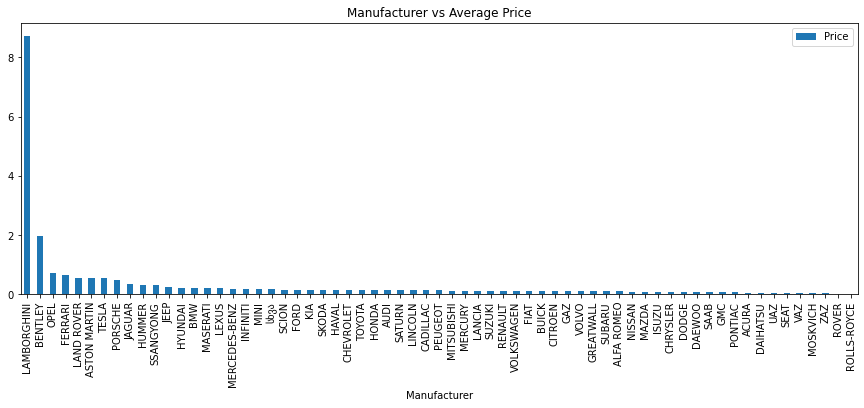

In [54]:
df = pd.DataFrame(train_copy.groupby(['Manufacturer'])['Price'].mean().sort_values(ascending = False))
df = df/100000
df.plot.bar(figsize=(15,5))
plt.title('Manufacturer vs Average Price')
plt.show()

Two manufacturers have high mean price : Lamborghini and Bentley. A group of manufacturers have similar mean range. Try to check if target encoding works as price ranges differ across categories

In [55]:
############################ Combine manufacturer and category 
train_copy['manu_cat'] = train_copy.Manufacturer + '_' + train_copy.Category
test_copy['manu_cat'] = test_copy.Manufacturer + '_' + test_copy.Category

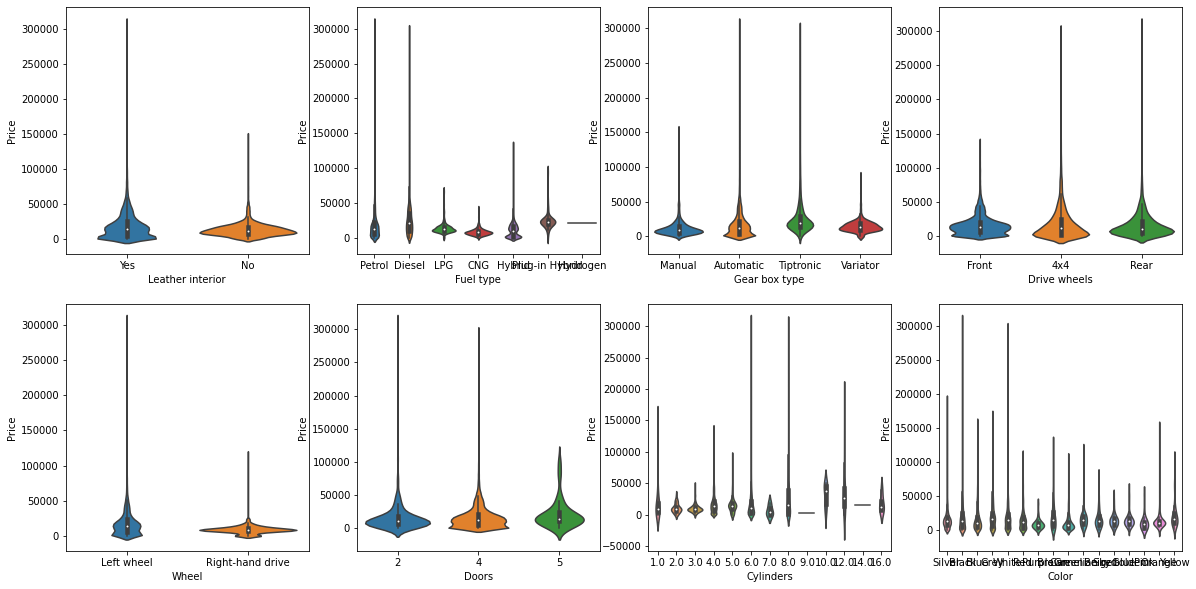

In [56]:
############################### Assessing violin plot for remaining categorical variables
fig,axs =  plt.subplots(figsize = (20,10),nrows=2,ncols=4)
cols_to_plot = ['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Doors','Cylinders','Color']
indxs = [[i,j] for i in range(2) for j in range(4)]
for i,j in zip(indxs,cols_to_plot):
  sb.violinplot(x=train_rem_out[j],y=train_rem_out['Price'],ax=axs[i[0],i[1]])
plt.show()

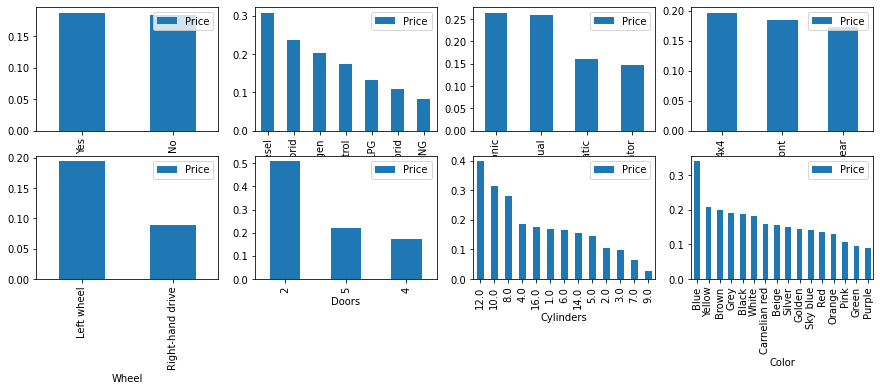

In [57]:
cols_to_plot = ['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Doors','Cylinders','Color']
cols_ind = [ [i,j] for i in range(2) for j in range(4)]
fig,axs = plt.subplots(figsize = (20,5),nrows=2,ncols=4)
for i,j in zip(cols_ind,cols_to_plot):
  df = pd.DataFrame(train_copy.groupby([j])['Price'].mean().sort_values(ascending = False))
  df = df/100000
  df.plot.bar(figsize=(15,5),ax=axs[i[0],i[1]])
  #axs[i[0],i[1]].set_title('{0} vs Average Price'.format(j))

plt.show()

In [ ]:
train_copy['leat_gear'] = train_copy['Leather interior'] + '_' + train_copy['Gear box type']
test_copy['leat_gear'] = test_copy['Leather interior'] + '_' + test_copy['Gear box type']

In [ ]:
########################## Applying linear regression between target and categorical variables and assessing sqrt(r_squared) as a proxy 
########################## to correlation between target and categorical variable.
cat_reg = ['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color','Manufacturer','Category','manu_cat','leat_gear']
import statsmodels.api as sm
for i in cat_reg:
  X = pd.get_dummies(train_copy[i],columns=[i])
  #X = sm.add_constant(X)
  Y=train_copy.Log_Price.values
  model = sm.OLS(Y,X)
  results = model.fit()
  print('Regressor ',i,' Corr : ',str(np.sqrt(results.rsquared)),' Rsq : ',str(results.rsquared))

Regressor  Leather interior  Corr :  0.022383660732896292  Rsq :  0.0005010282678054034
Regressor  Fuel type  Corr :  0.2491630531806783  Rsq :  0.06208222707031752
Regressor  Gear box type  Corr :  0.22414306919087545  Rsq :  0.05024011546630558
Regressor  Drive wheels  Corr :  0.0728323683526361  Rsq :  0.005304553879854068
Regressor  Wheel  Corr :  0.08426772881355848  Rsq :  0.007101050119395436
Regressor  Color  Corr :  0.06721182890429482  Rsq :  0.004517429944660201
Regressor  Manufacturer  Corr :  0.2718185264139605  Rsq :  0.07388531130185694
Regressor  Category  Corr :  0.16910789691761258  Rsq :  0.02859748079989788
Regressor  manu_cat  Corr :  0.3516155079666885  Rsq :  0.1236334654426724
Regressor  leat_gear  Corr :  0.23392843492699886  Rsq :  0.05472251266739514


In [58]:
train_copy[['Levy','Engine volume','Cylinders','Doors','Mileage','Airbags','Log_Price']].corr()

,Levy,Engine volume,Cylinders,Doors,Mileage,Airbags,Log_Price
Levy,1.000000,0.378117,0.251632,0.096430,-0.021203,0.125015,-0.057257
Engine volume,0.378117,1.000000,0.777228,-0.017697,-0.006292,0.221991,-0.021627
Cylinders,0.251632,0.777228,1.000000,-0.036033,-0.001720,0.174112,-0.042971
Doors,0.096430,-0.017697,-0.036033,1.000000,-0.006287,0.048088,-0.017282
Mileage,-0.021203,-0.006292,-0.001720,-0.006287,1.000000,-0.009174,-0.019186
Airbags,0.125015,0.221991,0.174112,0.048088,-0.009174,1.000000,-0.096414
Log_Price,-0.057257,-0.021627,-0.042971,-0.017282,-0.019186,-0.096414,1.000000


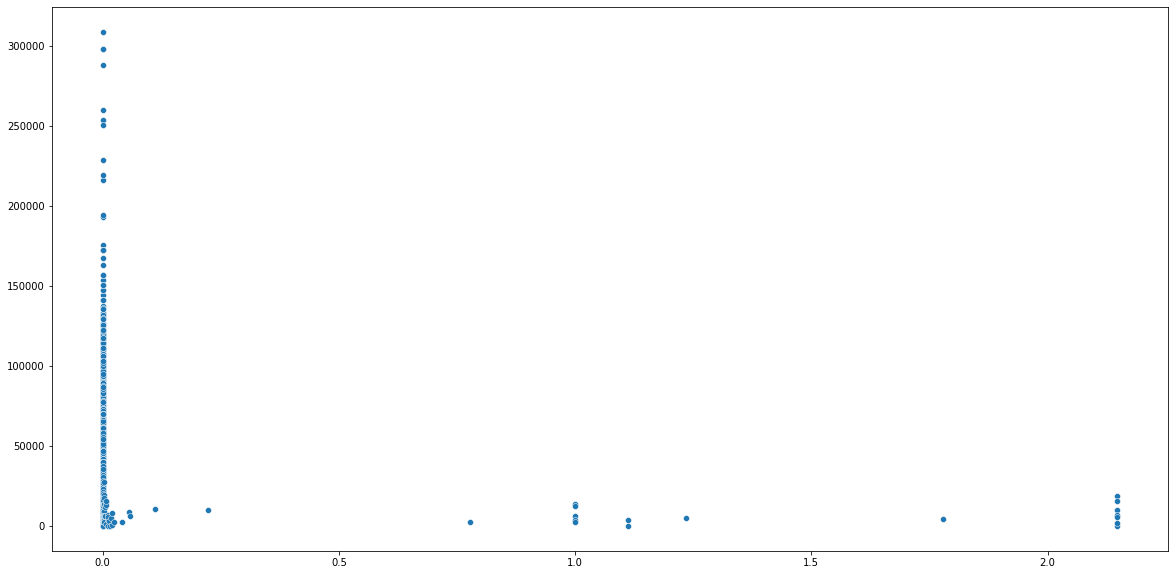

In [59]:
#fig,axs = plt.subplots(figsize = (20,5),nrows=1,ncols=2)
train_rem_out = train_copy.loc[:18920,:]
df1 = train_rem_out[['Mileage','Price']].sort_values(ascending = True,by=['Mileage'])
df1['Mileage'] = df1.Mileage/1e9
plt.figure(figsize = (20,10))
sb.scatterplot(x = df1['Mileage'].values,y = df1['Price'].values)
plt.show()

We can see that as mileage increases the prices also decreases. We can create a mileage  bucket.

### **Model training,cross validation and prediction**

In [ ]:
cols_to_drop = ['ID','Model','Price','Log_Price','Pow_Price']
bin_cols = ['Leather interior','Wheel']
cols_to_ohe = ['Drive wheels', 'Gear box type', 'Fuel type', 'leat_gear','manu_cat']
cols_to_enc=['Color', 'Manufacturer','Category']
num_cols=['Airbags', 'Engine volume','Mileage','Prod. year','num_years_passed','Levy']

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_log_error,make_scorer
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import StackingRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import SGDRegressor,HuberRegressor,ElasticNetCV,LassoCV,LinearRegression
from category_encoders import target_encoder,leave_one_out,cat_boost,count 
from sklearn.compose import make_column_selector
from sklearn.compose import TransformedTargetRegressor
SEED = 1993

In [ ]:
train_copy = train_copy.sample(frac=1).reset_index().drop(['index'],axis=1)
train1 = train_copy.drop(cols_to_drop,axis=1)
train1['Flag']='train'
test1 = test_copy.drop(list(set(cols_to_drop)-set(['Log_Price','Pow_Price'])),axis=1)
test1['Flag']='test'
comb_data = pd.concat([train1,test1],axis=0)

In [ ]:
############################### Encode binary columns
if bin_cols!=None:
  labenc=LabelEncoder()
  for c in bin_cols:
    comb_data[c]=labenc.fit_transform(comb_data[c])

In [ ]:
############################## Encode OHE columns
if cols_to_ohe!=None:
  for c in cols_to_ohe:
    comb_data=pd.get_dummies(comb_data,columns=[c],drop_first=True)

In [ ]:
train1 = comb_data[comb_data.Flag == 'train']
test1 = comb_data[comb_data.Flag == 'test']

In [ ]:
def rmsle_func(actual,predicted):
  predicted=np.abs(predicted)
  return np.sqrt(mean_squared_log_error(actual, predicted))
rmsle_score = make_scorer(rmsle_func,greater_is_better=False)

In [ ]:
xgb.__version__

'1.4.0-SNAPSHOT'

In [ ]:
def score(params):
    print("Training with params: ")
    print(params)
    #num_round = int(params['n_estimators'])
    #del params['n_estimators']
    #dtrain = xgb.DMatrix(train_features, label=y_train)
    #dvalid = xgb.DMatrix(valid_features, label=y_valid)
    #watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    #gbm_model = xgb.train(params, dtrain, num_round,
    #                      evals=watchlist,
    #                      verbose_eval=True)
    #predictions = gbm_model.predict(dvalid,
    #                                ntree_limit=gbm_model.best_iteration + 1)
    
    params['depth'] = int(params['depth'])
    params['iterations'] = int(params['iterations'])
    params['border_count'] = int(params['border_count'])
    cv=5
    
    pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('create_df', ConvArrToDF(col_names=range(train_copy.drop(cols_to_drop,axis = 1).shape[1]))),
                      ('model', CatBoostRegressor(random_state=1993,cat_features=cols_to_enc,verbose=0,**params))])
    cp=cross_val_predict(pipe1,train_copy.drop(cols_to_drop,axis = 1),train_copy[target],verbose=10,cv=5)
    split_pt = len(cp) // cv + 1
    split_arr=[ split_pt+split_pt*i if i<cv-1 else len(cp)  for i in range(cv)]
    cp_split_arr = np.split(cp,split_arr)[:-1]
    act_split_arr=np.split(train_copy[target].values,split_arr)[:-1]
    score = np.mean([ rmsle_func(act,pred) for act,pred in zip(act_split_arr,cp_split_arr)])
    #score = rmsle_func(y_valid, predictions)
    # TODO: Add the importance for the selected features
    print("\tScore {0}\n\n".format(score))
    # The score function should return the loss (1-score)
    # since the optimize function looks for the minimum
    loss = score
    return {'loss': loss, 'status': STATUS_OK}



In [ ]:
def optimize(random_state=SEED):
    """
    This is the optimization function that given a space (space here) of 
    hyperparameters and a scoring function (score here), finds the best hyperparameters.
    """
    '''
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        #'eval_metric': 'rmsle',
        'objective': 'reg:squaredlogerror',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    '''
    space = {
        'depth': hp.quniform("depth", 3, 15, 1),
        'border_count': hp.uniform ('border_count', 32, 255),
        'learning_rate': hp.loguniform('learning_rate', -5.0, -2),
        'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8),
        'iterations' : hp.uniform('iterations',500,2000)
       }
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=30)
    return best

In [ ]:
#train_features,valid_features,y_train,y_valid = train_test_split(train_copy.drop(cols_to_drop,axis=1),train_copy[target], test_size=0.2,
#                                random_state=SEED,shuffle=True)

In [ ]:
#best_hyperparams = optimize()
#print("The best hyperparameters are: ", "\n")
#print(best_hyperparams)
#xgb_params = {'booster': 'gbtree', 'colsample_bytree': 0.7000000000000001, 'eta': 0.17500000000000002, 'gamma': 0.9, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 462.0, 'objective': 'reg:squaredlogerror', 'seed': 1993, 'silent': 1, 'subsample': 0.75, 'tree_method': 'exact'}

In [ ]:
class ConvArrToDF(BaseEstimator, TransformerMixin):
  def __init__(self,num_prev_pipe=None):
    self.num_prev_pipe=num_prev_pipe
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X,y=None):
    X = pd.DataFrame(X)
    X = pd.concat([X.loc[:,self.num_prev_pipe:],X.loc[:,list(range(self.num_prev_pipe))]],axis=1)
    float_cols,oth_cols=0,0
    for i in X.columns:
      try:
        X.loc[:,i]=X.loc[:,i].astype(float)
        float_cols=float_cols+1
      except:
        X.loc[:,i]=X.loc[:,i].astype(object)
        oth_cols=oth_cols+1
    if oth_cols>0:
      X=pd.concat([X.select_dtypes(include='float'),X.select_dtypes(include='object')],axis =1)
    X.columns=range(X.shape[1])
    return X


In [ ]:
total_cols= train1.shape[1]
len_enc_cols=len(cols_to_enc)
cols_to_enc_ind = list(range(total_cols-len_enc_cols,total_cols))

In [ ]:
train1 = pd.concat([train1.select_dtypes(exclude='object'),train1.select_dtypes(include='object')],axis=1)
test1 = pd.concat([test1.select_dtypes(exclude='object'),test1.select_dtypes(include='object')],axis=1)

In [ ]:
space = {
        'n_estimators': 1000,
        'eta': 0.01,
        'objective' :  'reg:squaredlogerror',
        'booster': 'gbtree',
        'tree_method': 'exact',
        'seed': 1993
    }
numeric_features=['Mileage','Prod. year']
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, [1,4]),
        ('cat_trans',target_encoder.TargetEncoder(),make_column_selector(dtype_include='object'))],remainder='passthrough')

pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      #  ('create_df', ConvArrToDF(col_names=range(train_copy.drop(cols_to_drop,axis = 1).shape[1]))),
                      #('model', SGDRegressor(loss='huber',penalty='elasticnet',shuffle=True,random_state=1993))])
                      ('model', GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,random_state=1993,max_depth=10))])

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      #  ('create_df', ConvArrToDF(col_names=range(train_copy.drop(cols_to_drop,axis = 1).shape[1]))),
                      #('model', ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005,2,5,10],max_iter=10000,random_state=1993))])
                      ('model', xgb.XGBRegressor(**space,random_state=1993))])

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                      #  ('create_df', ConvArrToDF(col_names=range(train_copy.drop(cols_to_drop,axis = 1).shape[1]))),
                      #('model', LassoCV(alphas = [1, 0.1, 0.001, 0.0005,2,5,10]))])
                      ('model', LGBMRegressor(max_depth=10,learning_rate=0.01,n_estimators=1000,random_state=1993))])

pipe4 = Pipeline(steps=[('create_df', ConvArrToDF(num_prev_pipe=3)),
                        ('preprocessor', preprocessor),
                      ('model', GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,random_state=1993,max_depth=10))])


In [ ]:
estimators = [ ('pipe1', pipe1),('pipe2', pipe2),('pipe3', pipe3)]
stack_reg=StackingRegressor(estimators=estimators,final_estimator=pipe4,cv=5,passthrough=True,verbose=10)
trans_reg = TransformedTargetRegressor(regressor=stack_reg,func=np.log,inverse_func=np.exp)

In [59]:
####################### Cross validated predictions and calculating cv scores 
cv=5
cp=cross_val_predict(trans_reg,train1,train_copy['Price'],verbose=10,cv=cv)
cp[cp==inf]

split_pt = len(cp) // cv + 1
split_arr=[ split_pt+split_pt*i if i<cv-1 else len(cp)  for i in range(cv)]
cp_split_arr = np.split(cp,split_arr)[:-1]
act_split_arr=np.split(train_copy[target].values,split_arr)[:-1]
[ rmsle_func(act,pred) for act,pred in zip(act_split_arr,cp_split_arr)]

In [ ]:
##################### Refit the above cross validated model on entire training data and predict the test
trans_reg.fit(train1,train_copy['Price'])
predictions = trans_reg.predict(test1)
pd.DataFrame({'Price':predictions},index=range(len(predictions))).to_csv('GBM_Sub4.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 14.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap